In [1]:
#@title Librerias

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.interpolate import lagrange
from scipy import integrate


In [2]:
#@title Gráficos métodos
def area_curva(f,a,b,nmax=8,n=2):
    D = (b-a)/nmax                                   # delta de x.
    N = nmax
    if n == 2:                                       # Si Simpson entonces
        N = nmax//2                                  # reducir nmax a la mitad y
        D = D*2                                      # multiplicar por 2 el delta.

    x = np.linspace(a,b,1000)                        # dividir x en mil puntos y
    plt.plot(x,f(x),c='b',lw=2)                      # graficar función en [a,b].
    plt.plot(a,f(a),'o',c='k')                       # graficar primer punto.
    plt.plot([b,b],[0,f(b)],'--',c='r',lw=1)         # graficar linea vertical.

    for i in range(N):                               # suma sobre áreas A1,A2,...,An.
        xi = a + i*D                                 # puntos de integración.
        x  = np.linspace(xi,xi+D)                    # valores de x en [xi,xi+D].

        if   n == 0:                                 # polinomio grado 0 (Riemann),
            xj = np.array([xi+D])                    # un solo punto de interpolación.
            pn = lagrange(xj,f(xj))

        elif n == 1:                                 # polinomio grado 1 (Traprezoidal),
            xj = np.array([xi,xi+D])                 # dos puntos de interpolación.
            pn = lagrange(xj,f(xj))

        elif n == 2:                                 # polinomio grado 2 (Simpson),
            xj = np.array([xi,xi+D/2,xi+D])          # tres puntos de interpolación.
            pn = lagrange(xj,f(xj))
            plt.plot(xi+D/2,f(xi+D/2),'o',color='k') # graficar puntos.

        Alpha = .5 if i == N//2 else .1              # tramparencia del area a graficar.
        plt.fill_between(x,pn(x),color="r",lw=2,alpha=Alpha) # Graficar area roja.
        plt.plot(xi+D,f(xi+D),'o',color='k')         # graficar puntos.
        plt.plot([xi,xi],[0,f(xi)],'--',c='r',lw=1)  # graficar lineas verticales.

        if (nmax!=8):                                # mostrar número de area.
            plt.text(xi+.1*D, 2, r'$A_{%d}$'%(i+1))


    if nmax == 8: # Cambiar ejes x,y para gráfico general de [x_0, ..., x_n].
        x_labels = [r'$x_0=a$',r'$x_1$',r'$x_2$','...', r'$x_{i-1}$',
                    r'$x_i$',r'$x_{i+1}$ ...',r'$x_{n-1}$',r'$x_{n}=b$']
        xv = np.linspace(a,b,len(x_labels))

        plt.yticks([0,5],['0','f(x)'],fontsize=14,)  # cambiar valores eje y.
        plt.xticks(xv, x_labels, fontsize=14)        # cambiar valores eje x.
        plt.text((nmax+D)/2, 2, r'$A_i$',size=18)
        plt.gca().spines['right'].set_color('none')  # remover linea derecha.
        plt.gca().spines['top'].set_color('none')    # remover linea superior.

# Métodos Numéricos para Integración

La integración numérica representa una herramienta matemática indispensable en diversos campos de la ciencia y la ingeniería, destacándose por su capacidad para *resolver integrales que carecen de solución analítica o son demasiado complejas para resolverse manualmente*. Su importancia radica en su versatilidad para abordar problemas prácticos como el cálculo de áreas irregulares, análisis de datos experimentales y resolución de ecuaciones diferenciales, ofreciendo soluciones aproximadas pero suficientemente precisas. Esta técnica resulta particularmente valiosa en el ámbito computacional, ya que permite automatizar cálculos complejos y obtener resultados en tiempo real, siendo aplicable tanto a datos discretos como a funciones continuas y discontinuas.










# Métodos de Newton–Cotes

## 1. Método de cuadratura (Riemman)
   Divide el intervalo de integración en subintervalos, y en cada uno de ellos aproxima el área bajo la curva usando un rectángulo. Existen varias variantes:

   - **Rectángulo Izquierdo**: usa el valor de la función en el extremo izquierdo de cada subintervalo.
   - **Rectángulo Derecho**: usa el valor de la función en el extremo derecho de cada subintervalo.

La **fórmula del punto medio** para la cuadratura de Riemann en un intervalo $[a, b]$ es una aproximación de la integral definida utilizando el valor de la función en el punto medio de cada subintervalo.

Para una función $f(x)$ en el intervalo $[a, b]$, si dividimos el intervalo en $n$ subintervalos de igual longitud $h$, la fórmula del punto medio se expresa como:

$$
\int_a^b f(x) \, dx \approx h \sum_{i=0}^{n-1} f\left( x_i + \frac{h}{2} \right)
$$

donde:

- $h = \frac{b - a}{n}$ es el ancho de cada subintervalo.
- $x_i = a + i \cdot h$ es el punto de inicio del $i$-ésimo subintervalo.
- $x_i + \frac{h}{2}$ es el **punto medio** del $i$-ésimo subintervalo.

In [3]:
#@title Cuadratura
def cuadratura_riemann(f, a, b, n):
  '''
  f: función a integrar
  a: límite inferior
  b: límite superior
  n: número de intervalos
  return: valor de la integral
  '''
  h = (b - a) / n
  integral = 0
  for i in range(n):
    x_i = a + i * h
    integral +=  f(x_i + h/2)
  return integral * h


In [4]:
f = lambda x: np.sin(x*2.2)+np.exp(0.1*x*2)+2
#f = lambda x: x**2
a = 0
b = 3
n = 10

cuadratura_riemann(f, a, b, n)


10.133014884821193

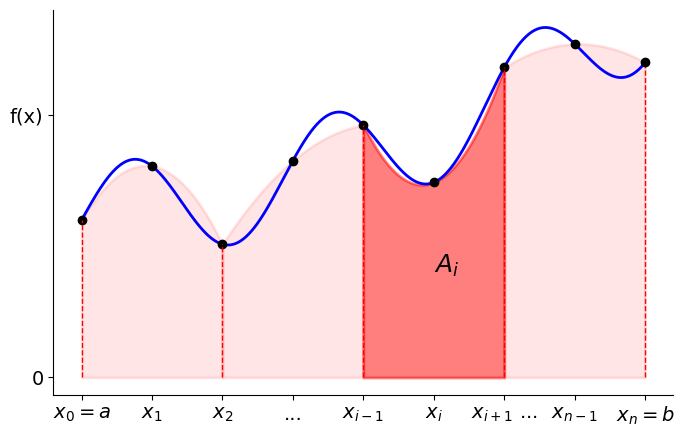

In [5]:
n = 8   # número de áreas a sumar (debe ser par para Simpson).
a,b  = 0,8                                           # intervalo.
f = lambda x: np.sin(x*2.2)+np.exp(0.1*x*2)+2      # función a integrar.

plt.figure(1,figsize = (8,5))
area_curva(f,a,b,n) # Riemann

## 2. Método del Trapecio compuesta
   En lugar de usar rectángulos, se aproxima el área bajo la curva usando trapecios, lo cual da una mejor aproximación en algunos casos.


La **fórmula del método del trapecio** para aproximar una integral definida en el intervalo $[a, b]$ divide el área bajo la curva en una serie de trapecios, en lugar de rectángulos. Esta fórmula se expresa como:

$$
\int_a^b f(x) \, dx \approx \frac{h}{2} \left[ f(a) + 2 \sum_{i=1}^{n-1} f(x_i) + f(b) \right] -\frac{h^3}{12}f''(\xi)
$$

donde:

- $h = \frac{b - a}{n}$ es el ancho de cada subintervalo.
- $f(a)$ y $f(b)$ son los valores de la función en los extremos del intervalo.
- $x_i = a + i \cdot h$ son los puntos intermedios donde se evalúa la función, con $i = 1, 2, \ldots, n-1$.


In [6]:
#@title Trapecio
def trapecio(f, a, b, n):
  '''
  f: función a integrar
  a: límite inferior
  b: límite superior
  n: número de intervalos
  return: valor de la integral
  '''
  h = (b - a) / n
  integral = 0.5 * (f(a) + f(b))
  for i in range(1, n):
    x_i = a + i * h
    integral += f(x_i)
  return integral * h

In [7]:
f = lambda x: np.sin(x*2.2)+np.exp(0.1*x*2)+2
a = 0
b = 8
n = 8
result = trapecio(f, a, b, n)
print(result)

36.005134417200615


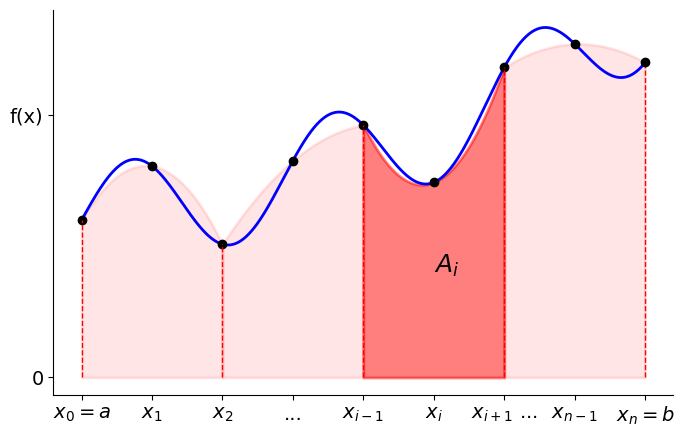

In [8]:
n = 8   # número de áreas a sumar (debe ser par para Simpson).
a,b  = 0,8                                           # intervalo.
f = lambda x: np.sin(x*2.2)+np.exp(0.1*x*2)+2        # función a integrar.

plt.figure(1,figsize = (8,5))
area_curva(f,a,b, n) # Riemann

## 3. Método de Simpson
   Utiliza parábolas para aproximar el área bajo la curva. Este método es más preciso que el del trapecio y se aplica generalmente a funciones suaves.

### Método de Simpson 1/3

La **fórmula del método de Simpson 1/3** para aproximar una integral definida en el intervalo $[a, b]$ es:

$$
\int_a^b f(x) \, dx \approx \frac{h}{3} \left[ f(a) + 4 \sum_{\text{impares}} f(x_i) + 2 \sum_{\text{pares}} f(x_i) + f(b) \right] -\frac{h^5}{90}f^{(4)}(\xi)
$$

donde:

- $h = \frac{b - a}{n}$ es el ancho de cada subintervalo, y $n$ debe ser par.
- $f(a)$ y $f(b)$ son los valores de la función en los extremos del intervalo.
- La suma de los términos **impares** es sobre los valores de $i = 1, 3, 5, \ldots, n-1$.
- La suma de los términos **pares** es sobre los valores de $i = 2, 4, 6, \ldots, n-2$.




In [9]:
#@title Simpson 1/3
def simpson13(f, a, b, n):
  '''
  f: función a integrar
  a: límite inferior
  b: límite superior
  n: número de intervalos
  return: valor de la integral
  '''
  h = (b - a) / n
  integral = (f(a) + f(b))
  # Suma de los términos impares
  for i in range(1, n, 2):
    x_i = a + i * h
    integral += 4 * f(x_i)
  # Suma de los términos pares
  for i in range(2, n, 2):
    x_i = a + i * h
    integral += 2 * f(x_i)
  return integral * h/3


In [10]:
n = 8   # número de áreas a sumar (debe ser par para Simpson).
a,b  = 0,8                                           # intervalo.
f = lambda x: np.sin(x*2.2)+np.exp(0.1*x*2)+2        # función a integrar.

result = simpson13(f, a, b, n)
print(result)

36.16353579238865


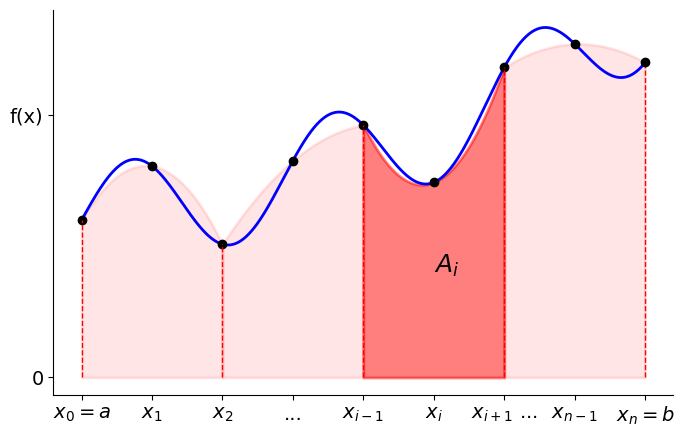

In [11]:
plt.figure(3,figsize = (8,5))
area_curva(f,a,b,n) # Simpson

### Método de Simpson 3/8

La **fórmula del método de Simpson 3/8** para aproximar una integral definida en el intervalo $[a, b]$ es:

$$
\int_a^b f(x) \, dx \approx \frac{3h}{8} \left[ f(a) + 3 \sum_{\text{no múltiplos de 3}} f(x_i) + 2 \sum_{\text{múltiplos de 3}} f(x_i) + f(b) \right]
$$

donde:

- $h = \frac{b - a}{n}$ es el ancho de cada subintervalo, y $n$ debe ser múltiplo de 3.
- $f(a)$ y $f(b)$ son los valores de la función en los extremos del intervalo.
- La suma de los términos con coeficiente 3 es sobre los valores de $f(x_i)$ donde $i$ no es múltiplo de 3.
- La suma de los términos con coeficiente 2 es sobre los valores de $f(x_i)$ donde $i$ es múltiplo de 3, excluyendo $a$ y $b$.

In [12]:
#@title Simpson 3/8
def simpson38(f, a, b, n):
  '''
  f: función a integrar
  a: límite inferior
  b: límite superior
  n: número de intervalos
  return: valor de la integral
  '''
  # Verificar que el número de intervalos es múltiplo de 3
  if n % 3 != 0:
      raise ValueError("El número de subintervalos 'n' debe ser múltiplo de 3 para el método de Simpson 3/8.")

  h = (b - a) / n
  integral = (3 * h / 8) * (f(a) + f(b))
  integral_3 = 0
  integral_no3 = 0

  for i in range(1, n):
      x_i = a + i * h
      # Coeficiente 3 para los puntos que no son múltiplos de 3, coeficiente 2 para los múltiplos de 3
      if i % 3 == 0:
          integral_3 += 2 * f(x_i)
      else:
          integral_no3 += 3 * f(x_i)

  # Multiplicar por el factor de Simpson 3/8
  integral += (3 * h / 8) * (integral_3 + integral_no3)

  return integral

In [13]:
a,b  = 0,8                                           # intervalo.
f = lambda x: np.sin(x*2.2)+np.exp(0.1*x*2)+2

result = simpson38(f, a, b, n=9)
print(result)

36.53563935490565


# Integración usando `scipy.integrate`

La integración numérica es útil cuando necesitamos calcular el área bajo una curva o resolver una integral definida, pero no tenemos una solución analítica o cuando estamos trabajando con datos discretos en lugar de una función continua. Scipy tiene algunos métodos númericos que nos pueden ayudar [ver documentación](https://docs.scipy.org/doc/scipy/reference/integrate.html).

In [14]:
from scipy.integrate import trapezoid # Método trapezoidal
from scipy.integrate import simpson # Método Simpson


In [15]:
a,b  = 0,8
f = lambda x: np.sin(x*2.2)+np.exp(0.1*x*2)+2
x = np.linspace(a, b, 100)

integral_trapezoidal = trapezoid(f(x), x)
integral_simpson = simpson(f(x), x=x)

print("Integral trapezoidal:", integral_trapezoidal)
print("Integral Simpson:", integral_simpson)


Integral trapezoidal: 36.07579831037921
Integral Simpson: 36.0761867924282


# Método de Integración de Romberg

El **método de integración de Romberg** es una técnica numérica para aproximar el valor de una integral definida de la forma:

$$
\int_a^b f(x) \, dx
$$

Este método se basa en la **extrapolación de Richardson** aplicada al **método del trapecio** de manera iterativa, para mejorar la precisión de la aproximación. Romberg utiliza los valores calculados con el método del trapecio en distintos pasos para generar una sucesión de valores que convergen rápidamente al valor exacto de la integral.

Para aproximar la integral, se aplica el método del trapecio con distintos valores de la distancia entre los puntos de evaluación (paso $h$). El proceso se inicia con un paso inicial grande y se va refinando iterativamente, obteniendo una matriz triangular de valores cada vez más precisos, conocida como **tabla de Romberg**.

Si definimos $T(h)$ como la aproximación de la integral usando el método del trapecio con paso $h$,

$$
T(h) \approx \frac{h}{2} \left[ f(a) + 2 \sum_{i=1}^{n-1} f(x_i) + f(b) \right] -\frac{b − a}{12}h^2f''(\xi)
$$


entonces cada paso se calcula a partir de los valores previos mediante la fórmula:

$$
R_{k,j} = R_{k,j-1} + \frac{R_{k,j-1} - R_{k-1,j-1}}{4^{j-1} - 1}
$$

donde $R_{k,j}$ representa la entrada en la fila $k$ y columna $j$ de la tabla de Romberg. En esta fórmula:

- $R_{k,0}$ es la aproximación inicial de la integral para un número específico de divisiones usando el método del trapecio.
- $R_{k,j}$ es la extrapolación de Richardson aplicada al valor $R_{k,j-1}$ para aumentar la precisión.

## Construcción de la Tabla de Romberg

1. **Paso inicial**: Se aplica el método del trapecio con un paso grande $h$ para obtener $R_{0,0}$, que es la aproximación inicial de la integral.
2. **Iteración**: Para cada iteración $k$, se reduce el tamaño de paso a la mitad ($h = h/2$), y se recalcula la integral aproximada con este nuevo paso.
3. **Extrapolación**: Usando los valores de la integral calculados en los pasos anteriores, se aplica la fórmula de extrapolación para llenar la tabla de Romberg hasta que la convergencia deseada sea alcanzada.

La tabla de Romberg resultante tiene la siguiente estructura:

$$
\begin{array}{cccc}
R_{0,0} & R_{0,1} & R_{0,2} & \cdots \\
R_{1,0} & R_{1,1} & R_{1,2} & \cdots \\
R_{2,0} & R_{2,1} & R_{2,2} & \cdots \\
\vdots  & \vdots  & \vdots  & \ddots \\
\end{array}
$$








## Ejemplo de Cálculo de una Integral con el Método de Romberg

Vamos a aproximar la integral definida:

$$
\int_0^1 e^x \, dx
$$

Sabemos que el valor exacto de esta integral es $ e - 1 $, pero vamos a calcular su aproximación usando el método de Romberg.

1. **Primera Aproximación con $ T(h) $ para diferentes valores de $ h $**:

   - Con $ h = 1 $: $$ T(h) = \frac{1}{2}(f(0) + f(1)) = \frac{1}{2}(1 + e) \approx 1.85914 $$
   - Con $ h = 0.5 $: Calculamos puntos intermedios en $ x = 0.5 $:

     $$
     T(h) = \frac{0.5}{2}(f(0) + 2f(0.5) + f(1)) \approx 1.75393
     $$

   - Con $ h = 0.25 $: Calculamos puntos intermedios en $ x = 0.25, 0.5, 0.75 $:

     $$
     T(h) \approx 1.72722
     $$

2. **Construcción de la Tabla de Romberg**

   Usamos la extrapolación para llenar la tabla de Romberg:

   $$
   \begin{array}{cccc}
   R_{0,0} & & & \\
   R_{1,0} & R_{1,1} & & \\
   R_{2,0} & R_{2,1} & R_{2,2} & \\
   \end{array}
   $$

   - $ R_{0,0} = T(1) \approx 1.85914 $
   - $ R_{1,0} = T(0.5) \approx 1.75393 $
   - $ R_{2,0} = T(0.25) \approx 1.72722 $

   Ahora, aplicamos la extrapolación de Richardson para completar las siguientes filas:

   - $ R_{1,1} = R_{1,0} + \frac{R_{1,0} - R_{0,0}}{4 - 1} \approx 1.71886 $
   - $ R_{2,1} = R_{2,0} + \frac{R_{2,0} - R_{1,0}}{4 - 1} \approx 1.71832 $
   - $ R_{2,2} = R_{2,1} + \frac{R_{2,1} - R_{1,1}}{4^2 - 1} \approx 1.71828 $

   La tabla final es:

   $$
   \begin{array}{ccc}
   1.85914 & & \\
   1.75393 & 1.71886 & \\
   1.72722 & 1.71832 & 1.71828 \\
   \end{array}
   $$

3. **Resultado Final**

   La mejor aproximación de la integral es $ R_{2,2} \approx 1.71828 $, que es muy cercana al valor exacto $ e - 1 \approx 1.71828 $.

Este ejemplo muestra cómo el método de Romberg utiliza la extrapolación para refinar las aproximaciones del método del trapecio, logrando una alta precisión con pocas iteraciones.


In [16]:
from scipy.integrate import romberg
romberg(f, a, b, show=True)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7fc1862657e0> from [0, 8]

 Steps  StepSize   Results
     1  8.000000 36.016752 
     2  4.000000 37.250208 37.661361 
     4  2.000000 35.529930 34.956504 34.776181 
     8  1.000000 36.005134 36.163536 36.244005 36.267303 
    16  0.500000 36.060643 36.079146 36.073520 36.070814 36.070043 
    32  0.250000 36.072425 36.076352 36.076166 36.076208 36.076229 36.076235 
    64  0.125000 36.075255 36.076198 36.076187 36.076188 36.076188 36.076188 36.076188 
   128  0.062500 36.075955 36.076188 36.076188 36.076188 36.076188 36.076188 36.076188 36.076188 

The final result is 36.07618768796527 after 129 function evaluations.


<ipython-input-16-3ddbc3a3f987>:2: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  romberg(f, a, b, show=True)


36.07618768796527

# Solución *exacta*

En ocasiones podemos obtener la solución simbólica exacta usando `sympy`

In [17]:
from sympy import integrate, symbols, sin, exp

In [18]:
x = symbols('x')
f = sin(2.2*x) + exp(0.2*x) + 2
integrate(f, (x, 0, 8))
#integrate(f,x)

36.0761876879214